In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# But
Il s'agit du deuxième notebook sur les techniques d'intégration de fonction à 1 dimension. Dans celui-ci, tu vas mettre en oeuvre la méthode dites **des trapèzes**. Cependant, je vais te l'as faire "démontrer" via une méthode qui sert en théorie de l'échantillonnage. 

# La fonction Triangle
Donc, écris une fonction nommée "Triangle(a,b,x)" qui a pour argument:
* a: la borne inférieure du support de la fonction
* b: la borne supérieure du support de la fonction
* x: la valeur à laquelle la fonction est évéluée.

La fonction est définie selon:
* si $x\in ]-\infty, a[$ alors $T(x)=0$;
* si $x\in[a,(a+b)/2[$ alors $T(x)$ est une fonction **affine croissante** satisfaisant $T(a)=0$ et $T((a+b)/2)=1$;
* si $x\in[(a+b)/2,b[$ alors $T(x)$ est une fonction **affine décroissante** satisfaisant $T(b)=0$ et $T((a+b)/2)=1$;

Utilises la séquence "if/elif/.../elif/else"

In [239]:
# %load ./solutions/exo_triangle.py

Bien, tu as sans doute trouver une méthode qui ressemble. Néanmoins, remarques que j'ai utilisé la méthode **assert** pour vérifier que les bornes $a$ et $b$ satisfont quelques conditions élémenatires. 

Maintenant, on veut pouvoir appeler la fonction avec un tableau de valeurs (cf. numpy array). Cependant, les instructions du type "$x<a$" sont ambigües quand $x$ est un tableau. En effet, que doit faire le code s'il a à gérer "array([-1.1,0.,0.1,0.6,2.])<0": doit il repondre True/False selon qu'il y a 1 élément qui satisfait la condition, ou aucun... 

Ce que l'on veut, c'est que la fonction soit appelée pour toutes les valeurs $x[i]$ et retourne alors une valeur $Triangle(0,1,x[i])$ (si $a=0$ et $b=1$). On utilise alors une fonction de numpy qui fait exactement ce travail: **np.vectorize()**.

In [6]:
vTriangle = np.vectorize(Triangle)

Maintenant, à partir de la fonction Triangle, on va la spécialiser pour avoir un support sur l'intervalle $[-w/n,w/n]$. Donc soit la fonction $T$ définie part:

In [7]:
def T(n,x,w=1):
    return vTriangle(-w/n,w/n,x)

Voyons quelques exemples de graphes de cette fonctions utilisées avec plusieurs valeurs de $n$. Observes le changement de support quand $n$ augmente.

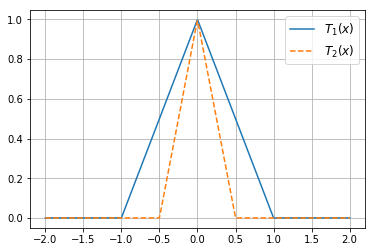

In [12]:
x = np.linspace(-2,2,500)
plt.plot(x,T(1,x),label=r"$T_1(x)$")
plt.plot(x,T(2,x),ls='--',label=r"$T_2(x)$")
plt.legend(fontsize=12)
plt.grid()
plt.show()

Maintenant, on va opérer une translation sur l'axe des abscises. Observe que quand on opére la transformation $x\rightarrow x-1$ alors le graphe de la fonction se déplace vers les **$x$ croissants** de 1 unité. Et de même pour $x\rightarrow x+1$, le graphe se déplace vers les **$x$ décroissants** de 1 unité. **La transformation à appliquer et dans le sens opposé du résultat ciblé**. Notes que tu retrouves cela pour les rotations par exemple, et les changements de bases en général.   

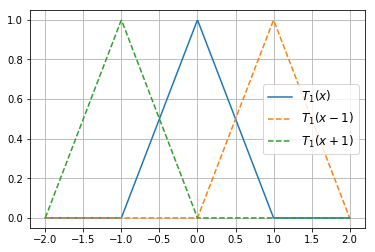

In [15]:
x = np.linspace(-2,2,500)
plt.plot(x,T(1,x),label=r"$T_1(x)$")
plt.plot(x,T(1,x-1),ls='--',label=r"$T_1(x-1)$")
plt.plot(x,T(1,x+1),ls='--',label=r"$T_1(x+1)$")
plt.legend(fontsize=12)
plt.grid()
plt.show()

Ecris maintenant, un petit code qui montre l'évolution des fonctions entre $[-2,2]$ (prend 500 points comme sur les exemples précédents):
* $T(1,x)$,
* $1.5 T(1,x-1)$ et
* leur somme $T(1,x)+1.5T(1,x-1)$

In [243]:
# %load ./solutions/exo_plot_interp1.py

**Notes bien**, car cela va te servir par la suite, que le graphe de la somme s'appuie sur ceux des deux triangles pour les veleurs de $x<0$ et $x>1$, par contre il oppére une fonction affine entre les 2 sommets des triangles dans l'intervalle $x\in[0,1]$. 

# La fonction à étudier
Soit donc maintenant la fonction $f(x)$ dont on va vouloir calculer l'intégrale. C'est une généralisation de celle que tu as utilisée dans le premier notebook sur l'intégration numérique.
$$
f(x,x1,x2,c) =  (x-x1)^2*(x-x2)^2+c
$$
Les valeurs par défaut des arguments x1, x2 et c sont 0, 1 et 0.2,
respectivement.

In [117]:
def f(x,x1=1,x2=3,c=0.2):
    return (x-x1)**2*(x-x2)**2+c

# L'échantilonnage

On veut construire le graphe des $f(x_i,x1,x2,c)$ avec $x1=1$, $x2=3$  et $c=0.2$ (les valeurs par défaut).

Construis le tableau numpy notez "xs" qui comporte $ns+1$ valeurs sur l'intervalle $[a,b]$, bornes $a$ et $b$ **incluses**. 

Tu affecteras aux variables $a$, $b$ et $ns$ les valeurs 0,3, et 10, respectivement.

In [169]:
# %load ./solutions/exo_xs_samples.py

Attention! selon toi les échantillons $xs[i]$ sont espacés de:
1. Tapez 1 pour $(b-a)/ns$     
2. Tapez 2 pour $(b-a)/(ns+1)$

C'est la période d'échantillonnage de la fonction.

In [170]:
# les valeurs f[x_i]
ys = f(xs)

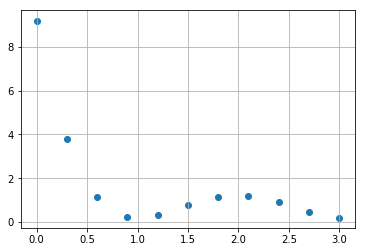

In [171]:
plt.scatter(xs,ys)
#plt.ylim()
plt.grid()
plt.show()

# Interpolation linéaire de f(x)

On veut constuire
$$
f_{app}\ (x) = \sum_{i=0}^{ns} f(x_i)\times T_{ns}(x-x_i)
$$
avec
$$
x_i = a + i \left(\frac{b-a}{ns}\right) \qquad i=0,\dots,ns
$$
et 
$T_n(x)$ étant la fonction **Triangle** de support $[-(b-a)/ns, (b-a)/ns]$

Ecris une fonction "fapp(x,xs,ys,w=1)" ayant pour argument:
* x: le tableau de valeurs auxquelles la fonction $fapp(x)$ est évaluées
* xs: le tableau des valeurs d'échantillonnage $xs[i]$ auxquelles la fonction $f$ a été évaluée
* ys: le tableau des valeurs $f(xs[i])$
* w: la variable qui définit le support de la fonction Triangle.

Pour ce faire:
* tu définiras une variable **locale** "ns" à partir de la taille du tableau "xs". "ns" doit avoir la même valeur que la variable "ns" définie lors de la construction de "xs" plus haut. Donc attention à la dimension du tableau "xs".
* tu définis une variable "res" initialisée à 0 qui te serviras d'accumulateur pour la somme sur $i:0,\dots,ns$.
* avec une boucle **for** tu parcours les index $i:0,\dots,ns$ pour calculer les valeurs $f(x_i)\times T_{ns}(x-x_i)$ avec le tableau "ys" et la fonction "T(ns,x,w)".

In [245]:
# %load ./solutions/exo_fapp.py

Sur le graphe suivant je fais apparaître:
* les points d'échantillonnage de la fonction $f(x)$
* les differents triangles qui servent à l'interpolation de la fonction (traits-tirés rouge)
* et la fonction $f_{app}\ (x)$ d'approiximation 

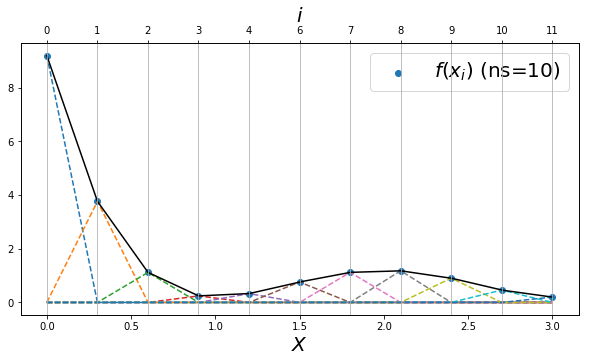

In [246]:
subx = np.linspace(a,b,1000)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.scatter(xs,ys,label=f"$f(x_i)$ (ns={ns})")
for i in range(ns+1):
    ax1.plot(subx,ys[i]*T(ns,subx-xs[i],w=b-a),'--')
ax1.plot(subx,fapp(subx,xs,ys,w=b-a),'k')
ax1.set_xlabel(r"$X$",fontsize=20)
#show sampling points index on top
def tick_function(X):
    V = X.size/(b-a) * (X-a)
    return ["%.0f" % z for z in V]
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(xs)
ax2.set_xticklabels(tick_function(xs))
ax2.set_xlabel(r"$i$",fontsize=20)
ax1.legend(fontsize=20)
plt.grid()
plt.show()

**La fonction $f_{app}\ (x)$ est l'interpolation par une fonction linéaire par morceaux**.  

# Calcul de l'intégrale approchée

## Formule
Quand on regarde le graphe noir  de $f_{app}\ (x)$, on se dit naturellement entre 2 échantillons (points bleus), on a des trapèzes, donc on peut obtenir une valeur approchée de la surface sous la courbe, donc une valeur approchée de l'integrale de $f(x)$ sur l'intervalle $[a,b]$.

Cependant, on peut se servir de la décomposition de la fonction approchée comme somme pondérées de fonctions triangles:

$$
f_{app}\ (x) = \sum_{i=0}^{ns} f(x_i)\times T_{ns}(x-x_i)
$$

La surface de $T_n(x)$ est égale à $(b-a)/n$. Les triangles des bords sont de surface moitiée, donc une approximation de l'intégrale sur $[a,b]$ de $f(x)$ est donnée par la somme:
$$
\int_a^b f(x) dx \approx \frac{(b-a)}{n} \left( \frac{f(x_0)+f(x_n)}{2} + \sum_{k=1}^{n-1}f(x_i) \right)
$$
C'est ce qu'on appelle l'approximation de l'intégrale par la méthode des trapèzes.

**Question**: Pour mémoire, la formule de l'intégration par les rectangles est données par:
$$
\int_a^b f(x) dx \approx \frac{b-a}{n} \sum_{i=0}^{n-1} f(x_i) 
$$
Quelle est la condition qui donne lieu à l'égalité entre les deux approximations ?

Tu noteras que j'ai choisi les bornes $a=0$ et $b=3$ pour ne pas me mettre dans cette condition.

## Formulation par produit scalaire

La formule de l'intégrale approchée par les "trapèzes" peut également s'écrire comme un produit scalaire:
$$
\int_a^b f(x) dx = \frac{(b-a)}{n}\ W.Y
$$
avec $W$ un vecteur de dimension $n+1$ dont les valeurs sont égales à 1 sauf pour la première et la dernière qui sont égales à 1/2:
$$
W = (1/2,1,\dots,1,1/2)
$$
et $Y$ un vecteur dont les valeurs sont données par l'échantillonnage de la fonction:
$$
Y = (f(x_0),f(x_1),\dots,f(x_n))
$$

La fonction "integ1" met en oeuvre ce dernier calcul. Tu y retrouves des ingrédients établis au cour de ce notebook. Notes l'usage de la fonction **dot(x,y)** de **numpy** qui calcule le produit scalaire entre les vecteurs x et y.

In [214]:
def integ1(a,b,ns,f):
    assert a<b, "Oh non! a doit être inférieur à b"
    assert a!=b, "Oh non! a doit être différent de b"
    ns = ns.astype(int)
    xs = np.linspace(a,b,ns+1,endpoint=True)
    ys = f(xs)
    W  = np.ones(ns+1)
    W[0] = W[-1] = 0.5
    return (b-a)/ns * np.dot(ys,W)

Tu te souviens de l'approximation par des rectangles? je la remets ici comme dans la version du premier notebook:

In [193]:
def integ0(a,b,n,f):
    x = np.linspace(a,b,n.astype(int),endpoint=False)
    y = f(x)
    return (b-a)/n * np.sum(y)

On peut donc comparer la convergence des deux méthodes en fonction du nombre d'échantillons

In [252]:
nNodes = np.logspace(1,4,10,dtype=int) 
app0 = []
app1 = []
for n in nNodes:
    a0 = integ0(0,3,n,f)
    a1 = integ1(0,3,n,f)
    app0.append(a0)
    app1.append(a1)
    print("n={0:5d}, Rect. App={1:.3f},\
 Trap. App={2:.3f} ".format(n,a0,a1))
app0 = np.array(app0)
app1 = np.array(app1)

n=   10, Rect. App=5.729, Trap. App=4.379 
n=   21, Rect. App=4.884, Trap. App=4.241 
n=   46, Rect. App=4.502, Trap. App=4.209 
n=  100, Rect. App=4.337, Trap. App=4.202 
n=  215, Rect. App=4.263, Trap. App=4.200 
n=  464, Rect. App=4.229, Trap. App=4.200 
n= 1000, Rect. App=4.214, Trap. App=4.200 
n= 2154, Rect. App=4.206, Trap. App=4.200 
n= 4641, Rect. App=4.203, Trap. App=4.200 
n=10000, Rect. App=4.201, Trap. App=4.200 


**Question**: Que constates-tu?

In [253]:
# la vraie valeur vaut (x1=1,x2=3,c=2/10 et a=0,b=3)
integ0_true = 21/5
# pour b=4 integ0_true = 104/15
#integ0_true = 104/15

Voyons comment se comporte la convergence selon le nombre d'échantillons. Voici le code pour faire le graphe (il est identique à celui du premier notebook)

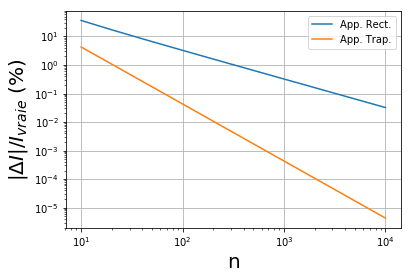

In [254]:
plt.plot(nNodes,100*np.abs(((app0/integ0_true)-1)),
         label='App. Rect.')
plt.plot(nNodes,100*np.abs(((app1/integ0_true)-1)),
        label='App. Trap.')
plt.xscale("log")
plt.yscale("log",nonposy='clip')
plt.xlabel('n',fontsize=20)
plt.ylabel(r"$\|\Delta I\|/I_{vraie}$ (%)",fontsize=20)
plt.legend()
plt.grid()
plt.show()

Questions:

* Quelle est la meilleure approximation ?
* Quelles sont les lois d'échelles ici
    * pour l'approximation en rectangles $1/n^r$: r= ?
    * pour l'approximation en trapèzes $1/n^t$: t= ?


* Quelle remarque sur la valeur de $r$ peux-tu faire? est-ce la même que celle obtenue lors du premier notebook qui était consacré à la méthode de rectangles pour intégrer la fonction $f(x)=x(x-1)^2$ entre $[0,1]$ ?

Tu peux par exemple refaire le calcul de app0 et app1 ci-dessus en changeant les bornes d'intégrations:

    a0 = integ0(0,4,n,f)
    a1 = integ1(0,4,n,f)
    la vraie valeur vaut alors 104/15 a changer dans integ0_true
    
On s'apperçoit que pour $f(x)=(x-1)^2(x-3)^2+0.2$ il y a une symétrie qui fait que dans une intégration sur [0,4] la dépendance en $1/n$ de l'intégration par rectangles est nulle, et ne compte alors qu'une dépendance en $1/n^2$.